In [65]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('all_stocks_5yr.csv')


In [66]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [67]:
companies = df.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [68]:
z = df.loc[df['Name'] == 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [69]:
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [70]:
trainingd = z.iloc[:, 4:5].values #closing values

In [71]:
trainingd.shape

(1259, 1)

In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [73]:
training_set_scaled.shape

(1259, 1)

In [74]:
##x_train stores the values of closing prices of past 45(or as specified in ##timestamp) days

##y_train stores the values of closing prices of the present day
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [75]:
y_train.shape

(1214,)

In [76]:
x_train.shape

(1214, 45)

In [77]:
x_train[0]

array([0.08995937, 0.09402205, 0.10330818, 0.09963242, 0.09421552,
       0.10795125, 0.10524279, 0.08357516, 0.08047978, 0.08106017,
       0.07100019, 0.07041981, 0.07583672, 0.09769781, 0.11994583,
       0.11510931, 0.11394854, 0.10543625, 0.11917199, 0.11007932,
       0.11182047, 0.10485587, 0.10833817, 0.12071967, 0.09750435,
       0.08589669, 0.08512285, 0.09885858, 0.09808474, 0.0913136 ,
       0.07854517, 0.07951248, 0.08396208, 0.09673051, 0.08106017,
       0.08028632, 0.0798994 , 0.06655059, 0.06887212, 0.08744438,
       0.09750435, 0.09189398, 0.09208744, 0.09344167, 0.07428903])

In [78]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [79]:
y_train[0]

0.0930547494679822

In [80]:
model = Sequential() #define the Keras model

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) #120 neurons in the hidden layer
##return_sequences=True makes LSTM layer to return the full history including outputs at all times
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output

In [81]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
1214/1214 [==============================] - 11s 9ms/step - loss: 0.0160
Epoch 2/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0023
Epoch 3/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 4/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 5/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 6/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 7/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 8/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 9/25
1214/1214 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 10/25
1214/1214 [==============================] - 8s 6ms/step - loss: 0.0017
Epoch 11/25
1214/1214 [==============================] - 8s 6ms/step - loss: 0.0020
Epoch 12/25
1214/1214 [==============================] - 8s 6ms/step - loss: 0.0018


In [82]:
z = df.loc[df['Name'] == 'BA']
z.info()
z.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 75388 to 76646
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


,date,open,high,low,close,volume,Name
75388,2013-02-08,77.24,77.395,76.280,76.56,5100424,BA
75389,2013-02-11,76.42,76.440,75.850,75.87,3677036,BA
75390,2013-02-12,76.06,76.250,75.830,75.99,3597463,BA
75391,2013-02-13,75.67,75.830,74.625,74.78,4313460,BA
75392,2013-02-14,74.69,75.310,74.540,74.93,3830371,BA


In [83]:
trainingd = z.iloc[:, 4:5].values #closing values
out=trainingd

In [84]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [85]:
x_test = []
y_test = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_test.append(training_set_scaled[i-timestamp:i, 0])
    y_test.append(out[i, 0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)

In [86]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1214, 45, 1)

In [87]:
y_pred=model.predict(x_test)
predicted=sc.inverse_transform(y_pred)
predicted

array([[ 86.378914],
       [ 86.852104],
       [ 87.14893 ],
       ...,
       [351.06894 ],
       [352.4582  ],
       [353.06393 ]], dtype=float32)

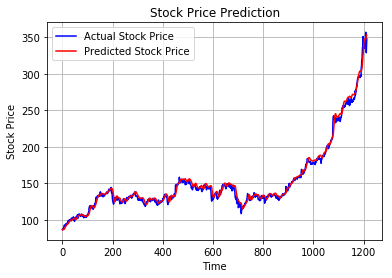

In [88]:
plt.plot(y_test,color='blue',label='Actual Stock Price')
plt.plot(predicted,color='red',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
def predict_stock(comp_name):
    z = df.loc[df['Name'] == comp_name]
    
    trainingd = z.iloc[:, 4:5].values #closing values
    out=trainingd
    
    sc = MinMaxScaler()
    training_set_scaled = sc.fit_transform(trainingd)
    
    
    x_test = []
    y_test = []
    timestamp = 45
    length = len(trainingd)
    for i in range(timestamp, length):
        x_test.append(training_set_scaled[i-timestamp:i, 0])
        y_test.append(out[i, 0])

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    y_pred=model.predict(x_test)
    predicted=sc.inverse_transform(y_pred)
    
    plot_stock(y_test,predicted)
    
    
def plot_stock(y_test,predicted):
    plt.figure(figsize=(20,10))
    plt.plot(y_test,color='blue',label='Actual Stock Price')
    plt.plot(predicted,color='red',label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    


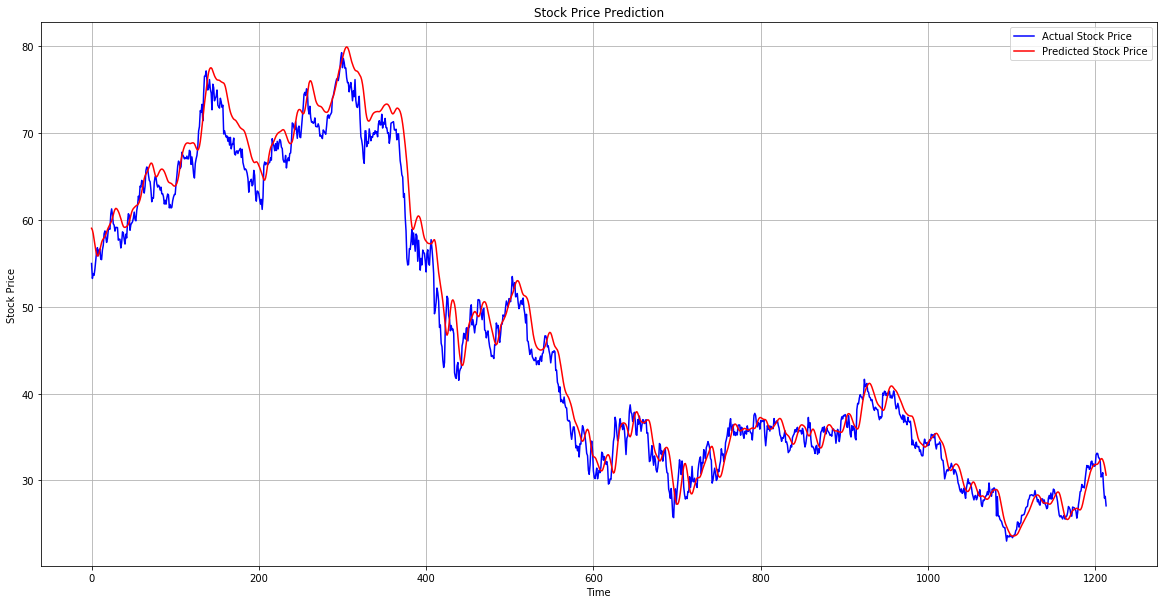

In [90]:
predict_stock('NBL')

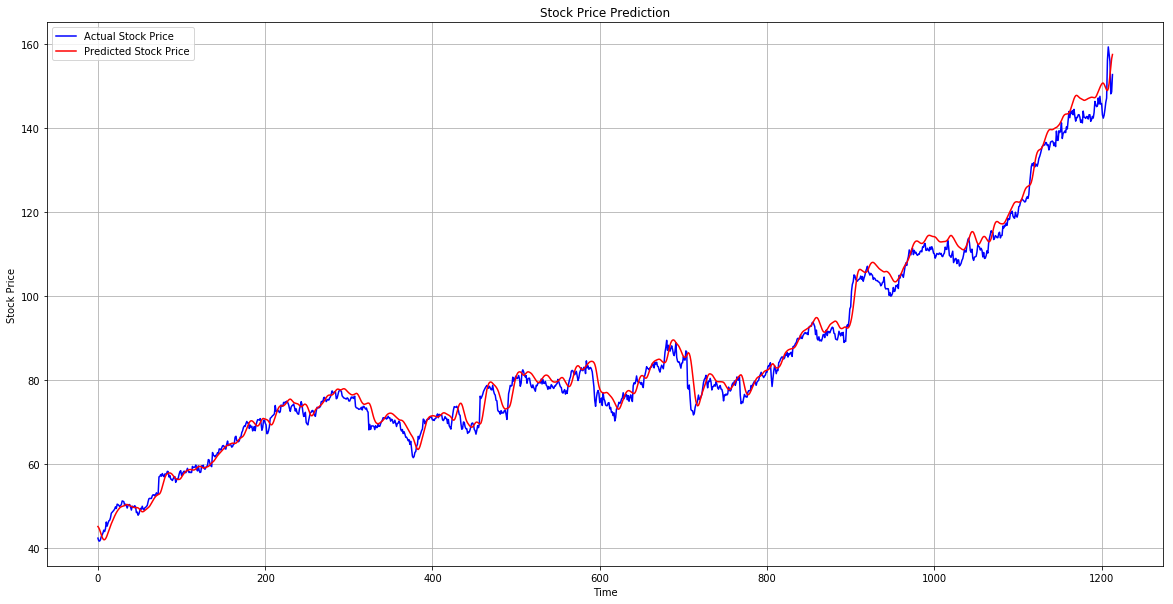

In [91]:
predict_stock('HRS')

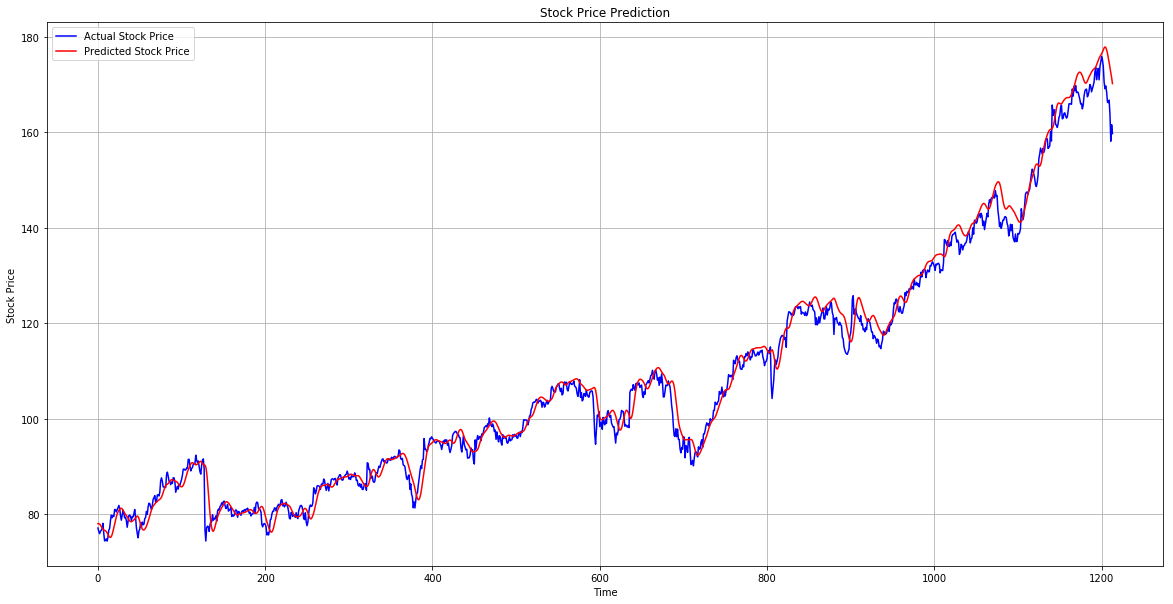

In [92]:
predict_stock('SWK')

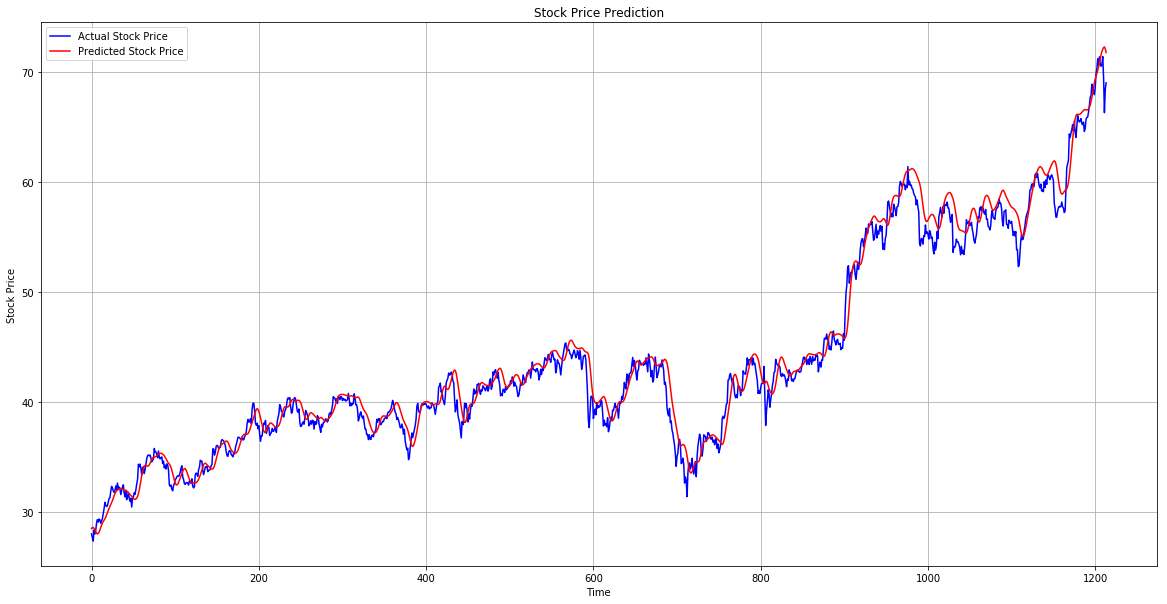

In [93]:
predict_stock('STI')

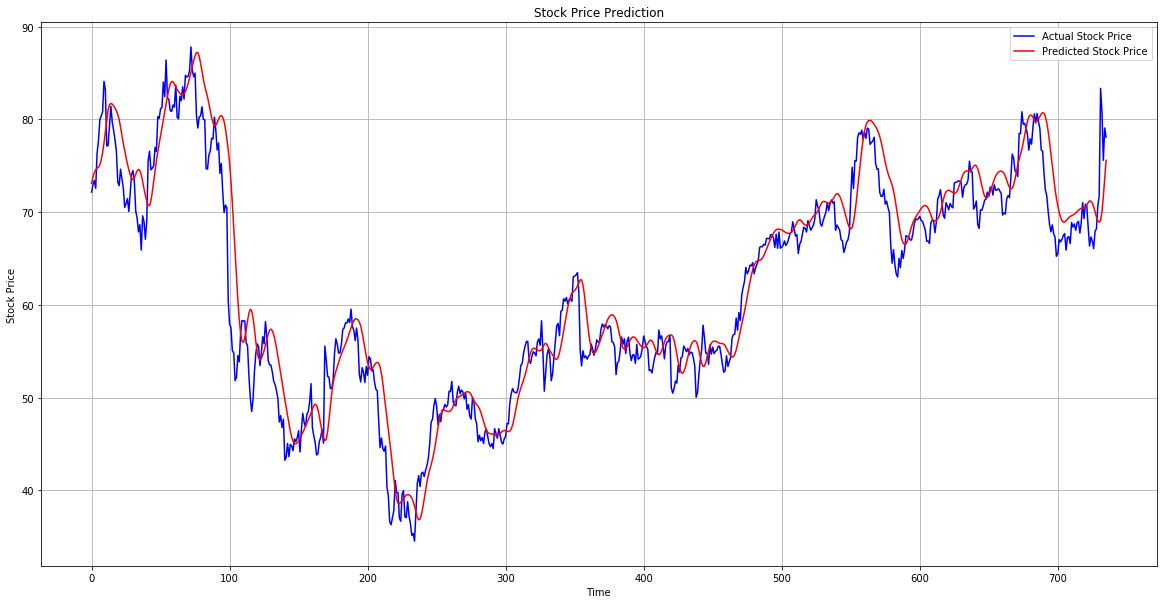

In [94]:
predict_stock('QRVO')

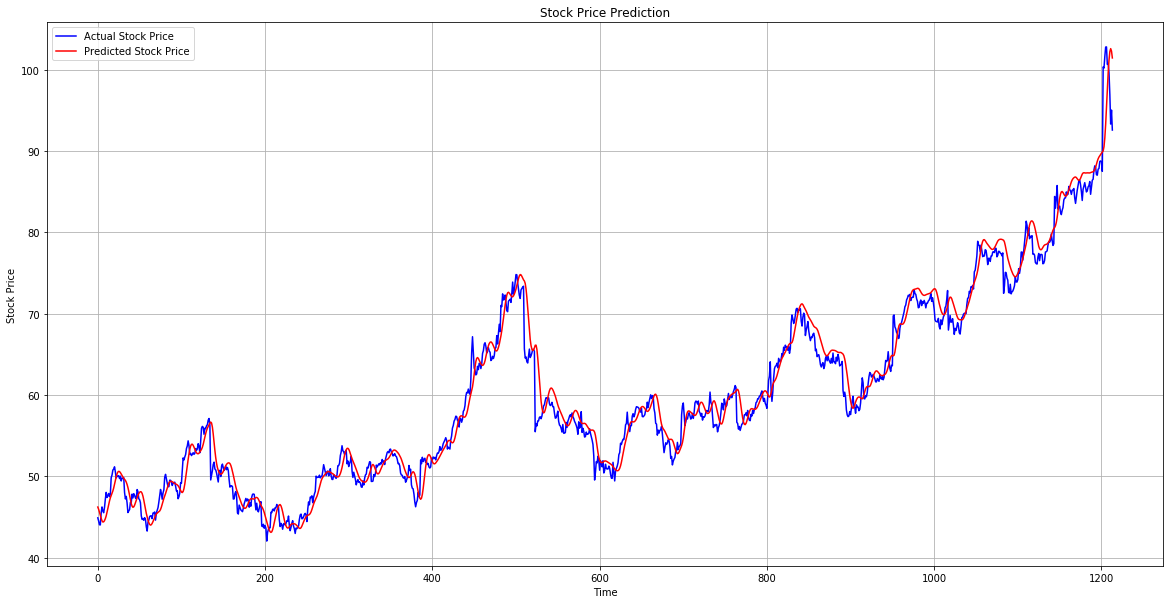

In [95]:
predict_stock('RMD')